
# Time Series Forecasting - Store Sales

This is the second part of the project, in the first we performed a deep dive into an anlaysis of sales and transactions. 

For our next task, we will use the insights gained from our analysis to determine how we will apply a predictive model to the data.

Time series provides many optional methods relative to forecasting, in addition to methods such as exponential smoothing, the ARIMA method could provide greater levels of accuracy; however, the observations will not exceed an 18-month period. 

- The interval of years we will examine are from 2013 - 2017
- Prediction range will be for 3, 6, and 12 months into 2018

In [146]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time series
#import statsmodel...


In [147]:
# Remove before finalize
train = pd.read_csv('/Users/jasonrobinson/Downloads/store_sales_clean/train_data_cleaned.csv', parse_dates=True, index_col="date")
test = pd.read_csv('/Users/jasonrobinson/Downloads/store_sales_clean/test_data_cleaned.csv', parse_dates=True, index_col="date")

In [ ]:
train = pd.read_csv('../input/store_sales_clean/train_data_cleaned.csv', parse_dates=True, index_col="date")
test = pd.read_csv(' ../input/store_sales_clean/test_data_cleaned.csv', parse_dates=True, index_col="date")

In [148]:
train.head(2)

,store_nbr,family,sales,onpromotion,city,type_of_store,cluster,dcoilwtico,transactions,n_holidays
date,,,,,,,,,,
2013-01-01,1,Others,0.0,0,Quito,D,13,93.14,NaN,1.0
2013-01-01,1,Others,0.0,0,Quito,D,13,93.14,NaN,1.0


In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   store_nbr      int64  
 1   family         object 
 2   sales          float64
 3   onpromotion    int64  
 4   city           object 
 5   type_of_store  object 
 6   cluster        int64  
 7   dcoilwtico     float64
 8   transactions   float64
 9   n_holidays     float64
dtypes: float64(4), int64(3), object(3)
memory usage: 251.8+ MB


In [150]:
train.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=3000888, freq=None)

In [153]:
#train['store_nbr'].unique()

In [154]:
train.describe()

,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions,n_holidays
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,2.143746e+06,2.755104e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00,8.481481e+00,6.788783e+01,1.694602e+03,1.662708e-01
std,1.558579e+01,1.101998e+03,1.221888e+01,4.649735e+00,2.566954e+01,9.632810e+02,4.202733e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01,5.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,4.640000e+01,1.046000e+03,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,5.330000e+01,1.393000e+03,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00,1.300000e+01,9.578000e+01,2.079000e+03,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.106200e+02,8.359000e+03,3.000000e+00


In [155]:
# ni stands for non-indexed
train_ni = train.copy

In [156]:
# 18-months
month_18 = train.loc['2016-02-15':'2017-08-15']
#print("All Sales for 18-month period", month_18)

In [158]:
targ_sales = train['sales']

date
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
Name: sales, dtype: float64

In [178]:
train_corr = train[['sales', 'transactions', 'n_holidays', 'dcoilwtico']].corr(method='pearson')
train_corr

,sales,transactions,n_holidays,dcoilwtico
sales,1.000000,0.214815,0.013455,-0.078885
transactions,0.214815,1.000000,0.043061,0.021867
n_holidays,0.013455,0.043061,1.000000,-0.051823
dcoilwtico,-0.078885,0.021867,-0.051823,1.000000


In [179]:
#train.groupby('n_holidays').agg(median=('sales', 'median'), mean=('sales', 'mean'), max=('sales', 'max'), min=('sales', 'min')).reset_index()


## Model development

Picking up where we left off beginning our model for autocorrelation, we will apply deep learning techniques to deliver a higher level of accuracy in prediction.

In [180]:
train_na = train.copy()
train_na = train_na.dropna()

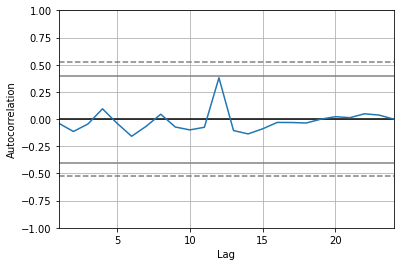

In [181]:
pd.plotting.autocorrelation_plot(train_na['2015':'2016']['transactions'].resample('1m').mean());

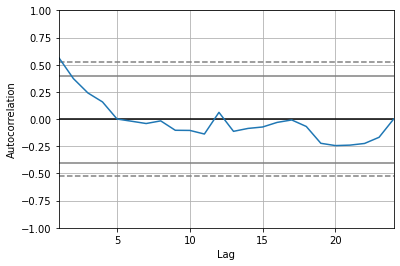

In [182]:
pd.plotting.autocorrelation_plot(train_na['2015':'2016']['sales'].resample('1m').mean());